In [10]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)


# Generate summary statistics
df_market_data.describe()


# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first few rows of the scaled DataFrame
df_scaled.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [12]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

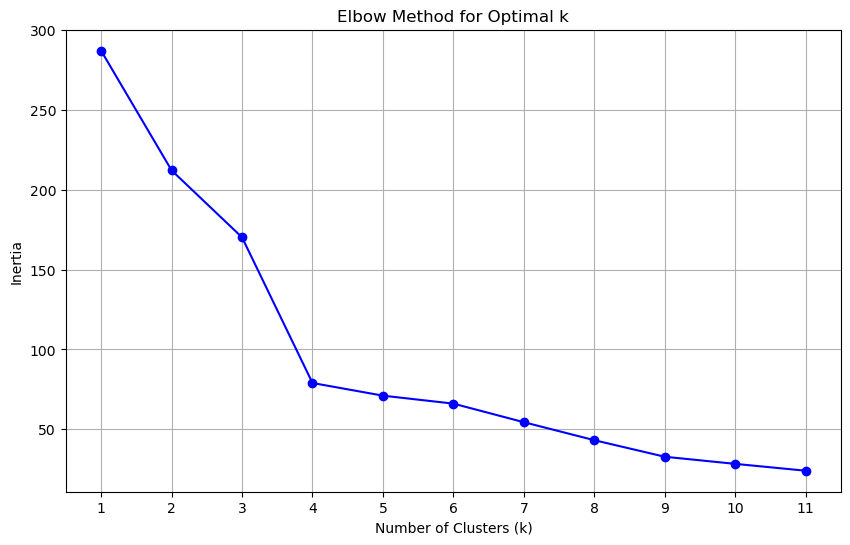

In [22]:
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Create a list with the number of k values from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia to the list of inertia values
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k_values": k_values,
    "inertia_values": inertia_values
}

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 

In [14]:
# Initialize PCA with 2 components (for PC1 and PC2)
pca = PCA(n_components=2, random_state=42)

# Fit and transform the scaled data to get the principal components
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2'],  # Rename the columns to 'PC1' and 'PC2'
    index=df_scaled.index
)


In [15]:
# Add the predicted clusters to the PCA DataFrame
df_pca['cluster'] = clusters


In [16]:
# Create a scatter plot using hvPlot
df_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id'],
    width=800,
    height=500,
    title='Cryptocurrency Clusters using K-means (k=4)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    legend='top_right'
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [2]:
# Import
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data into Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Initialize StandardScaler
scaler = StandardScaler()

# Scale data
scaled_data = scaler.fit_transform(df_market_data)

# Create new DataFrame with scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Perform PCA with 3 components
pca = PCA(n_components=3, random_state=42)
principal_components_3 = pca.fit_transform(df_scaled)

# Retrieve variance
explained_variance = pca.explained_variance_ratio_

# Calculate total explained variance of the three principal components
total_explained_variance = sum(explained_variance)

# Print explained variance for each component and the total
print("Explained Variance of Each Component:")
for i, ev in enumerate(explained_variance):
    print(f"Component {i+1}: {ev:.4f}")
    
print("\nTotal Explained Variance of Three Components:", total_explained_variance)

# Create new DataFrame with PCA data and set "coin_id" as index
df_pca_3 = pd.DataFrame(
    data=principal_components_3,
    columns=['PC1', 'PC2', 'PC3'], 
    index=df_scaled.index  
)

# Display the new DataFrame
df_pca_3.head()


Explained Variance of Each Component:
Component 1: 0.3720
Component 2: 0.3470
Component 3: 0.1760

Total Explained Variance of Three Components: 0.895031657030984


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

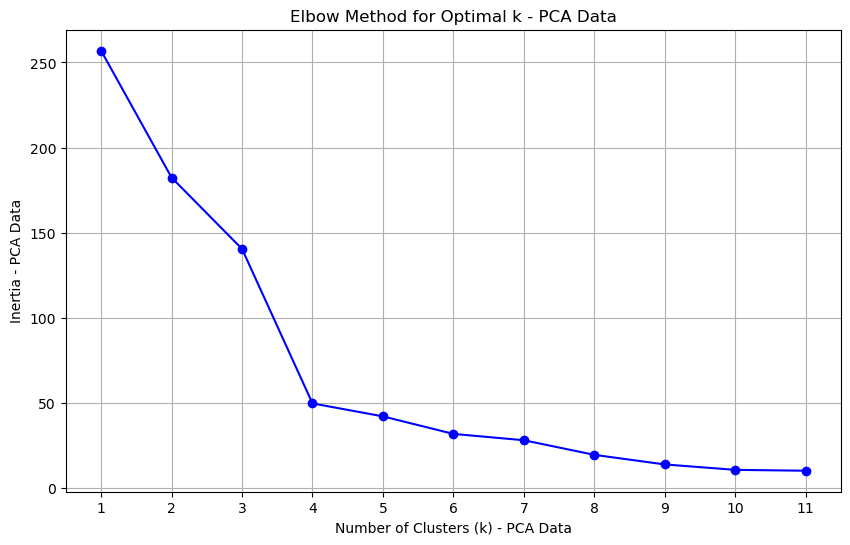

Best value for k using PCA data: 4


In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data into DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Initialize StandardScaler
scaler = StandardScaler()

# Scale data
scaled_data = scaler.fit_transform(df_market_data)

# Create new DataFrame with scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Perform PCA with 3 components
pca = PCA(n_components=3, random_state=42)
principal_components_3 = pca.fit_transform(df_scaled)

# Create DataFrame for PCA components
df_pca_3 = pd.DataFrame(
    data=principal_components_3,
    columns=['PC1', 'PC2', 'PC3'],  
    index=df_scaled.index  
)

# Create list with number of k-values from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute inertia with each possible value of k
for k in k_values:
    # Initialize KMeans with the current k value
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the PCA-transformed data
    kmeans_pca.fit(df_pca_3)
    
    # Append the inertia to the list of inertia values
    inertia_values_pca.append(kmeans_pca.inertia_)

# Create a dictionary with data to plot the Elbow curve for PCA data
elbow_data_pca = {
    "k_values": k_values,
    "inertia_values_pca": inertia_values_pca
}

# Plot a line chart with all the inertia values computed with different values of k for PCA data
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k) - PCA Data')
plt.ylabel('Inertia - PCA Data')
plt.title('Elbow Method for Optimal k - PCA Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# The best value for k
best_k_pca = 4  

print("Best value for k using PCA data:", best_k_pca)


In [4]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

# Load the data 
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_market_data)

# Perform PCA with 3 components
pca = PCA(n_components=3, random_state=42)
principal_components_3 = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
df_pca_3 = pd.DataFrame(
    data=principal_components_3,
    columns=['PC1', 'PC2', 'PC3'],  
    index=df_market_data.index  
)

# Best value of k obtained from elbow method
best_k_pca = 4

# Initialize KMeans model with best value of k
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)

# Fit the KMeans model using the PCA data
kmeans_pca.fit(df_pca_3)

# Predict clusters to group cryptocurrencies using PCA data
clusters_pca = kmeans_pca.predict(df_pca_3)

# Create copy of DataFrame with PCA data
df_clusters_pca = df_pca_3.copy()

# Add new column to store predicted clusters
df_clusters_pca['cluster'] = clusters_pca

# Create scatter plot using hvPlot
df_clusters_pca.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id'],
    width=800,
    height=500,
    title=f'Cryptocurrency Clusters using K-means (k={best_k_pca}) - PCA Data',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    legend='top_right'
)


C:\Users\rshaw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [ ]:
#### Answer the following question: 

**Question:** What is the impact of using fewer features to cluster the data using K-Means?

**Answer:** It simplifies the data while still representing variations, making the visualization easily digestable to understanding patterns.

